In [74]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importing libraries

In [75]:
import os
import shutil

# Library
import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Setting
import warnings
warnings.filterwarnings("ignore")

# SK and stuff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Variables

Path variables

In [76]:
drive_path = "/content/drive/MyDrive"
course_path = drive_path + "/Course Recommendation System | THESIS 2023"
course_dataset_path = course_path + "/dataset"
course_model_path = course_path + "/model"

In [77]:
dataset_files_path = course_dataset_path
dataset_files = os.listdir(dataset_files_path)

Variables

In [78]:
sample_number = 10

test_size = 0.15
random_state = 42

threshold_for_training = 150

Relation of strand and course

In [79]:
# list down all the strand
listStrand = ['humss', 'tvl', 'stem', 'abm', 'sportstrack', 'gas', 'artsdesign']

# list of strand and its related courses
related_humss = [
    'Bachelor of Arts in English Language Studies',
    'Bachelor of Science in Social Work',
    'Bachelor of science in criminology',
    'Bachelor of Arts in Political Science',
    'Bachelor of Arts in History',
    'Bachelor of Arts in Broadcasting',
    'Bachelor of Arts in Journalism',
    'BATSILYER NG SINING SA FILIPINO',
    'BACHELOR OF EARLY CHILDHOOD EDUCATION',
    'BACHELOR OF CULTURE AND ARTS EDUCATION',
    'BACHELOR OF SECONDARY EDUCATION',
    'BACHELOR OF ARTS IN ISLAMIC STUDIES',
    'BACHELOR OF ARTS IN ASIAN STUDIES',
    'BACHELOR OF SPECIAL NEED EDUCATION',
    'Bachelor of Science in Hospitality Management'
    'Bachelor of Elementary Education'
]

related_gas = [
    'Bachelor of Public Administration',
    'Bachelor of Elementary Education',
    'BACHELOR OF SECONDARY EDUCATION',
    'Bachelor of Science in Community Development'
]

related_stem = [
    'Bachelor of Science in Biology',
    'Bachelor of Science in Architecture',
    'Bachelor of Science in Psychology',
    'Bachelor of Science in Computer Science',
    'BACHELOR OF SCIENCE IN SANITARY ENGINEERING',
    'BACHELOR OF SCIENCE IN AGRICULTURAL BIOSYSTEM ENGINEERING',
    'Bachelor of Science in Electronics And Communication Engineering',
    'Bachelor of Science in Electrical Engineering',
    'Bachelor of Science in Civil Engineering',
    'Bachelor of Science in Mechanical Engineering',
    'Bachelor of Science in Environmental Engineering',
    'Bachelor of Science in Geodetic Engineering',
    'Bachelor of Science in Industrial Engineering',
    'Bachelor of Science in Computer Engineering',
    'BACHELOR OF SCIENCE in NUTRITION AND DIETETICS',
    'Bachelor of Science in Nursing'
]

related_tvl = [
    'Bachelor of Science in Home Economics',
    'Bachelor of science in Information Technology',
    'Bachelor of Science in Hospitality Management'
]

related_sportstrack = [
    'Bachelor of Physical Education',
    'Bachelor of Science in Exercise and Sports Sciences'
]


related_abm = [
    'Bachelor of Science in Accountancy',
    'Bachelor of Science in Hospitality Management'
]

related_artsdesign = [
    'BACHELOR OF CULTURE AND ARTS EDUCATION'
]


class StrandCourse:
  def __init__(self, strand, listCourse):
    self.strand = strand
    self.listCourse = listCourse

dick = {}
dick['HUMSS'] = StrandCourse("HUMSS", related_humss)
dick['TVL'] = StrandCourse("TVL", related_tvl)
dick['STEM'] = StrandCourse("STEM", related_stem)
dick['GAS'] = StrandCourse("GAS", related_gas)
dick['ABM'] = StrandCourse("ABM", related_abm)
dick['SPORTSTRACK'] = StrandCourse("SPORTSTRACK", related_sportstrack)
dick['ARTSDESIGN'] = StrandCourse("ARTSDESIGN", related_artsdesign)

# INITIALIZER

In [80]:
version_files = os.listdir(course_model_path)
last_version = [int(i) for i in version_files[-1].split("|")[0].replace(" ", "") if i.isdigit()][0]

# Create model version folder
latest_version = int(last_version) + 1
current_version_folder = course_model_path + "/v" + str(latest_version) + " | accuracy = "
os.mkdir(current_version_folder)

In [81]:
fh = open(current_version_folder + "/model_info.txt", "w")
fh.write(f"\n --- MODEL INFO ---")
fh.write(f"\n ")
fh.write(f"\n Threshold for training   : " + str(threshold_for_training))
fh.write(f"\n Test size                : " + str(test_size))
fh.write(f"\n ")

2

# Preparing data

In [82]:
# Setting for table
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [83]:
# Empty dataframe
dataframe = pd.DataFrame({
    "GPA": [],
    "CET": [],
    "STRAND": [],
    "COURSE": []
  }
)

dataframe

,GPA,CET,STRAND,COURSE


In [84]:
fh.write(f"\n -- Files")

threshold_approved_cources = []
threshold_not_approved_cources = []

for file in dataset_files:
    if file.endswith(".csv"):

        # Imports data from CSV
        df = pd.read_csv(dataset_files_path + "/" +str(file))

        df.dropna(axis='columns', how="all", inplace=True)
        df.dropna(inplace=True)

        num_rows = df.shape[0]

        if num_rows >= threshold_for_training:
          # Add current dataset to main dataframe

          threshold_approved_cources.append(str(file) + ": " + str(num_rows))

          print(str(file))
          df["GPA"] = pd.to_numeric(df["GPA"])
          df["CET"] = pd.to_numeric(df["CET"])

          dataframe = dataframe.append(df, ignore_index=True)
        else:
          threshold_not_approved_cources.append(str(file) + ": " + str(num_rows))
          print(str(file) + " not enough data. Data found is " + str(num_rows))

        print("----")



fh.write(f"\n - APPROVED COURSES")
for course in threshold_approved_cources:
  fh.write(f"\n " + str(course))

fh.write(f"\n ")

fh.write(f"\n - NOT APPROVED COURSES")
for course in threshold_not_approved_cources:
  fh.write(f"\n " + str(course))

fh.write(f"\n ")

AB HISTORY.csv
----
AB POLSCI.csv
----
ABIS.csv
----
BS ACCOUNTANCY.csv
----
BS BIOLOGY.csv
----
BAELS.csv
----
BATSILYER NG SINING FILIPINO.csv
----
BCAED.csv
----
BS AGRICULTURAL.csv not enough data. Data found is 51
----
BS ARCHI.csv
----
BS CHEMISTRY.csv not enough data. Data found is 44
----
BS CIVIL EngineeR.csv
----
BS COMPUTER Science.csv
----
BS CRIMINOLOGY.csv
----
BS ECONOMICS.csv
----
BS Electrical Engineering.csv
----
AB BROADCASTING.csv
----
AB JOURNALISM.csv
----
BS Environmental Engineering.csv
----
BS Geodetic Engineering.csv
----
BS INDUSTRIAL ENGINEERING.csv
----
BS MATH.csv not enough data. Data found is 45
----
BS Mechanical EngineerinG.csv
----
BS NURSING.csv
----
BS PHYSICS.csv not enough data. Data found is 32
----
BS PSYCHOLOGY.csv
----
BS STATISTICS.csv not enough data. Data found is 41
----
BSED.csv
----
BSNED.csv
----
Computer Engineering.csv
----
CPADS.csv
----
BS HOME ECONOMICS.csv
----
BS HOSPITALLITY MANAGEMENT.csv
----
BS ND.csv
----
ABAS.csv
----
BPED.

2

Renaming column names to appropriate one

In [85]:
# dataframe = dataframe.rename(
#    columns={
#        'SENIOR HIGH SCHOOL GPA': 'GPA',
#        'SENIOR HIGH SCHOOL STRAND': 'Strand',
#        'CET RESULT': 'CET',
#        'COURSE' : 'Course'
#    }
# )

# Extracting information

In [86]:
dataframe.dtypes

GPA       float64
CET       float64
STRAND     object
COURSE     object
dtype: object

In [87]:
dataframe.shape

(6153, 4)

In [88]:
dataframe.head()

,GPA,CET,STRAND,COURSE
0,92.0,83.0,TVL,BACHELOR OF ARTS IN HISTORY
1,96.0,69.0,HUMSS,BACHELOR OF ARTS IN HISTORY
2,90.0,69.0,TVL,BACHELOR OF ARTS IN HISTORY
3,91.0,65.0,HUMSS,BACHELOR OF ARTS IN HISTORY
4,91.0,68.0,TVL,BACHELOR OF ARTS IN HISTORY


In [89]:
dataframe.sample(sample_number)

,GPA,CET,STRAND,COURSE
2394,88.81,75.00,HUMSS,BACHELOR OF ARTS IN JOURNALISM
5362,94.00,76.07,STEM,BACHELOR OF SCIENCE IN SOCIAL WORK
473,97.10,90.00,ABM,BACHELOR OF SCIENCE IN ACCOUNTANCY
2424,90.00,73.00,HUMSS,BACHELOR OF ARTS IN JOURNALISM
5992,95.00,82.55,GAS,BACHELOR OF SCIENCE IN ELECTRONICS AND COMMUNI...
4489,89.00,80.00,HUMSS,BACHELOR SCIENCE IN NUTRITION AND DIETETICS
5993,92.02,65.00,STEM,BACHELOR OF SCIENCE IN ELECTRONICS AND COMMUNI...
3327,90.00,90.00,ABM,BACHELOR OF SCIENCE IN PSYCHOLOGY
1119,87.00,77.00,GAS,BATSILYER NG SINING SA FILIPINO
667,89.00,97.21,STEM,BACHELOR OF SCIENCE IN BIOLOGY


In [90]:
# dataframe.describe()

In [91]:
dataframe['COURSE'].value_counts()

BACHELOR OF SCIENCE IN BIOLOGY                                       227
BACHELOR OF SCIENCE IN ELECTRONICS AND COMMUNICATIONS ENGINEERING    172
BACHELOR OF SCIENCE IN SOCIAL WORK                                   172
BACHELOR OF SCIENCE IN SANITARY ENGINEERING                          172
BACHELOR OF SCIENCE IN INFORMATION TECHNOLOGY                        172
BACHELOR OF SCIENCE IN COMMUNITY DEVELOPMENT                         172
BACHELOR OF SCIENCE IN COMPUTER SCIENCE                              168
BACHELOR OF SECONDARY EDUCATION                                      168
BACHELOR OF ELEMENTARY EDUCATION                                     167
BACHELOR OF SCIENCE IN EXERCISE AND SPORTS SCIENCES                  162
BACHELOR OF ARTS IN ASIAN STUDIES                                    161
BACHELOR OF SCIENCE IN PSYCHOLOGY                                    156
BACHELOR OF SCIENCE IN NURSING                                       155
BACHELOR OF ARTS IN POLITICAL SCIENCE              

# Pre-processing

In [92]:
dataframe['GPA'].mean()

90.6428844466114

In [93]:
dataframe['CET'].mean()

82.83919063871284

In [94]:
dataframe['CET'] = dataframe['CET'].fillna(dataframe['CET'].mean())

In [95]:
dataframe['GPA'] = dataframe['GPA'].fillna(dataframe['GPA'].mean())

In [96]:
dataframe['STRAND'] = dataframe['STRAND'].fillna(dataframe['STRAND'].value_counts().index.tolist()[-1] )

Dropping NaN value if there is

In [97]:
null_column_count = (dataframe.isnull().sum())
null_column_count[null_column_count > 0]

Series([], dtype: int64)

In [98]:
# Drop column
dataframe.dropna(axis='columns', how="all", inplace=True)

# Drop row
dataframe.dropna(inplace=True)

In [99]:
dataframe.head()

,GPA,CET,STRAND,COURSE
0,92.0,83.0,TVL,BACHELOR OF ARTS IN HISTORY
1,96.0,69.0,HUMSS,BACHELOR OF ARTS IN HISTORY
2,90.0,69.0,TVL,BACHELOR OF ARTS IN HISTORY
3,91.0,65.0,HUMSS,BACHELOR OF ARTS IN HISTORY
4,91.0,68.0,TVL,BACHELOR OF ARTS IN HISTORY


In [100]:
dataframe.shape

(6153, 4)

In [101]:
null_column_count = (dataframe.isnull().sum())
null_column_count[null_column_count > 0]

Series([], dtype: int64)

In [102]:
dataframe['STRAND'].unique()

array(['TVL', 'HUMSS', 'GAS', 'STEM', 'ABM', 'TVL ICT', 'TVL  DFT',
       'TVL AQC', 'TVL HE', 'TVL  CSS', 'HGAS', 'SPORTSTRACK',
       'ARTSDESIGN', 'CSS', 'TVL-CSS', 'TVL-COOKERY',
       'TVL-HOME ECONOMICS', 'TVL-EPAS', 'TVL-ELECTRONICS',
       'TVL-AGRI -FISHERIES'], dtype=object)

In [103]:
# Corrects input in STRAND
for row in range(dataframe.shape[0]):

  text = dataframe.iloc[row, -2].lower()

  for strand in listStrand:
    if strand.lower() in text:
      dataframe.iloc[row, -2] = strand.upper()

In [104]:
dataframe['STRAND'].unique()

array(['TVL', 'HUMSS', 'GAS', 'STEM', 'ABM', 'SPORTSTRACK', 'ARTSDESIGN',
       'CSS'], dtype=object)

In [105]:
# Empty dataframe
empty_dataframe = pd.DataFrame({
    "GPA": [],
    "CET": [],
    "STRAND": [],
    "COURSE": []
  }
)

# loop down the list of unique strand
for strand in dataframe['STRAND'].unique():

  # get all the row that is equal to the strand
  df1 = dataframe[dataframe["STRAND"] == strand]

  try:
    # loop down the list of strand that is from df1
    for course in dick[strand].listCourse:

      # get all the row that is equal to the course
      df2 = df1[df1["COURSE"] == course.upper()]
      empty_dataframe = empty_dataframe.append(df2, ignore_index=True)

  except:
    print(strand + " list of courses not found.")

CSS list of courses not found.


In [106]:
dataframe = empty_dataframe

In [107]:
fh.write(f"\n Final dataset shape: " + str(dataframe.shape))
fh.write(f"\n ")

dataframe.shape

(2802, 4)

In [108]:
dataframe["STRAND"].value_counts()

STEM           1366
HUMSS          1005
TVL             213
ABM             104
GAS              95
SPORTSTRACK      19
Name: STRAND, dtype: int64

In [109]:
list_of_courses = dataframe["COURSE"].value_counts()
list_of_courses

BACHELOR OF SCIENCE IN BIOLOGY                         148
BACHELOR OF SCIENCE IN NURSING                         143
BACHELOR OF SCIENCE IN SANITARY ENGINEERING            142
BACHELOR OF SCIENCE IN CIVIL ENGINEERING               135
BACHELOR OF SCIENCE IN COMPUTER ENGINEERING            126
BACHELOR OF SCIENCE IN GEODETIC ENGINEERING            122
BACHELOR OF SCIENCE IN MECHANICAL ENGINEERING          110
BACHELOR OF SCIENCE IN HOME ECONOMICS                  108
BACHELOR OF ARTS IN POLITICAL SCIENCE                  103
BACHELOR OF SCIENCE IN PSYCHOLOGY                       98
BACHELOR OF SCIENCE IN ACCOUNTANCY                      98
BACHELOR OF SCIENCE IN COMPUTER SCIENCE                 96
BACHELOR OF SPECIAL NEED EDUCATION                      93
BACHELOR OF SECONDARY EDUCATION                         91
BACHELOR OF ARTS IN HISTORY                             91
BACHELOR OF EARLY CHILDHOOD EDUCATION                   90
BACHELOR OF SCIENCE IN ENVIRONMENTAL ENGINEERING        

Applying label encoder

In [110]:
labelEncoder = LabelEncoder()

In [111]:
dataframe["STRAND"] = labelEncoder.fit_transform(dataframe["STRAND"])

In [112]:
le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
print(le_name_mapping)

fh.write(f"\n Dictionary (STRAND): " + str(le_name_mapping))
fh.write(f"\n ")

{'ABM': 0, 'GAS': 1, 'HUMSS': 2, 'SPORTSTRACK': 3, 'STEM': 4, 'TVL': 5}


2

In [113]:
dataframe["COURSE"] = labelEncoder.fit_transform(dataframe["COURSE"])

In [114]:
dataframe["COURSE"].value_counts()

13    148
27    143
29    142
14    135
16    126
21    122
26    110
22    108
5     103
28     98
11     98
17     96
32     93
31     91
2      91
7      90
19     88
24     84
30     79
4      79
12     74
33     73
25     71
18     71
1      71
0      70
6      61
3      45
23     40
10     35
15     28
8      20
9      10
20      9
Name: COURSE, dtype: int64

In [115]:
list_of_courses

BACHELOR OF SCIENCE IN BIOLOGY                         148
BACHELOR OF SCIENCE IN NURSING                         143
BACHELOR OF SCIENCE IN SANITARY ENGINEERING            142
BACHELOR OF SCIENCE IN CIVIL ENGINEERING               135
BACHELOR OF SCIENCE IN COMPUTER ENGINEERING            126
BACHELOR OF SCIENCE IN GEODETIC ENGINEERING            122
BACHELOR OF SCIENCE IN MECHANICAL ENGINEERING          110
BACHELOR OF SCIENCE IN HOME ECONOMICS                  108
BACHELOR OF ARTS IN POLITICAL SCIENCE                  103
BACHELOR OF SCIENCE IN PSYCHOLOGY                       98
BACHELOR OF SCIENCE IN ACCOUNTANCY                      98
BACHELOR OF SCIENCE IN COMPUTER SCIENCE                 96
BACHELOR OF SPECIAL NEED EDUCATION                      93
BACHELOR OF SECONDARY EDUCATION                         91
BACHELOR OF ARTS IN HISTORY                             91
BACHELOR OF EARLY CHILDHOOD EDUCATION                   90
BACHELOR OF SCIENCE IN ENVIRONMENTAL ENGINEERING        

In [116]:
le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
print(le_name_mapping)

fh.write(f"\n Dictionary (COURSE): " + str(le_name_mapping))
fh.write(f"\n ")

{'BACHELOR OF ARTS IN ASIAN STUDIES': 0, 'BACHELOR OF ARTS IN BROADCASTING': 1, 'BACHELOR OF ARTS IN HISTORY': 2, 'BACHELOR OF ARTS IN ISLAMIC STUDIES': 3, 'BACHELOR OF ARTS IN JOURNALISM': 4, 'BACHELOR OF ARTS IN POLITICAL SCIENCE': 5, 'BACHELOR OF CULTURE AND ARTS EDUCATION': 6, 'BACHELOR OF EARLY CHILDHOOD EDUCATION': 7, 'BACHELOR OF ELEMENTARY EDUCATION': 8, 'BACHELOR OF PHYSICAL EDUCATION': 9, 'BACHELOR OF PUBLIC ADMINISTRATION': 10, 'BACHELOR OF SCIENCE IN ACCOUNTANCY': 11, 'BACHELOR OF SCIENCE IN ARCHITECTURE': 12, 'BACHELOR OF SCIENCE IN BIOLOGY': 13, 'BACHELOR OF SCIENCE IN CIVIL ENGINEERING': 14, 'BACHELOR OF SCIENCE IN COMMUNITY DEVELOPMENT': 15, 'BACHELOR OF SCIENCE IN COMPUTER ENGINEERING': 16, 'BACHELOR OF SCIENCE IN COMPUTER SCIENCE': 17, 'BACHELOR OF SCIENCE IN CRIMINOLOGY': 18, 'BACHELOR OF SCIENCE IN ENVIRONMENTAL ENGINEERING': 19, 'BACHELOR OF SCIENCE IN EXERCISE AND SPORTS SCIENCES': 20, 'BACHELOR OF SCIENCE IN GEODETIC ENGINEERING': 21, 'BACHELOR OF SCIENCE IN HOME

2

Dealing with outliers

<Axes: xlabel='GPA', ylabel='Density'>

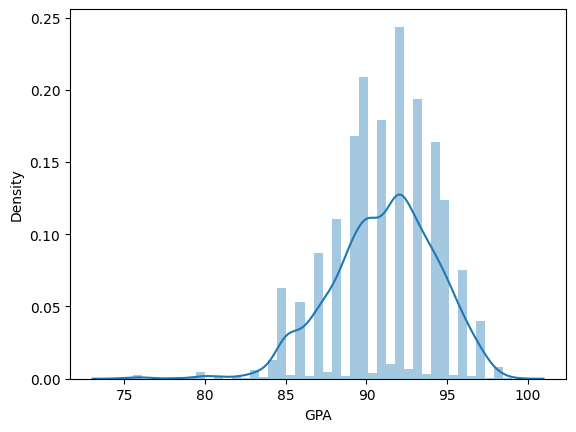

In [117]:
column_target = "GPA"
sns.distplot(dataframe[column_target])

<Axes: xlabel='GPA'>

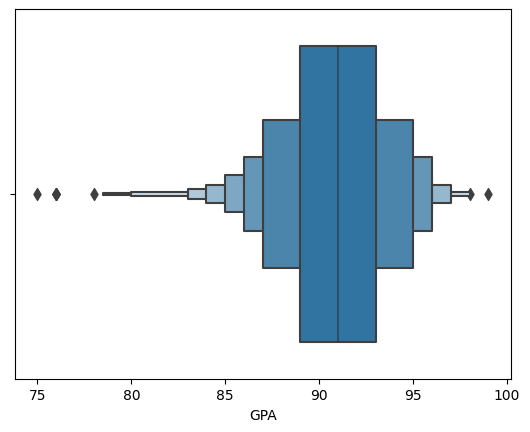

In [118]:
sns.boxenplot(x=dataframe[column_target])

<Axes: xlabel='STRAND', ylabel='Density'>

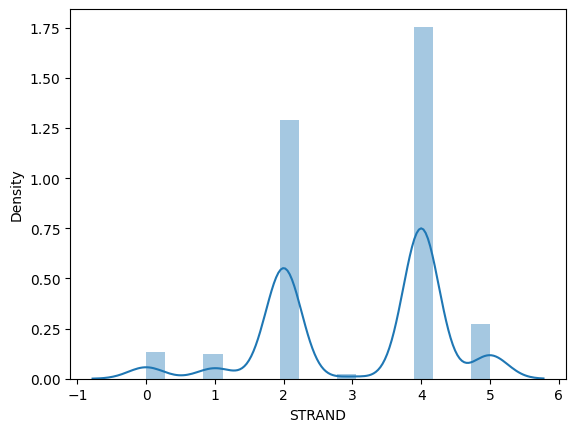

In [119]:
column_target = "STRAND"
sns.distplot(dataframe[column_target])

<Axes: xlabel='STRAND'>

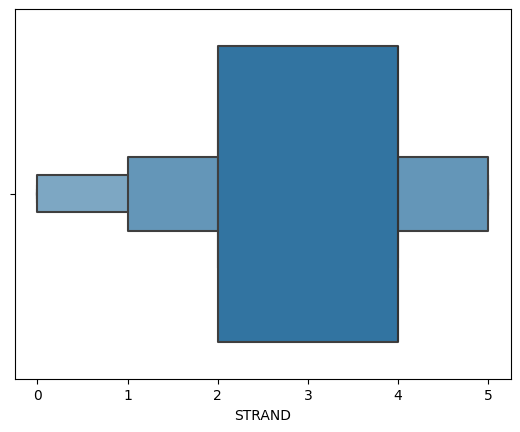

In [120]:
sns.boxenplot(x=dataframe[column_target])

<Axes: xlabel='CET', ylabel='Density'>

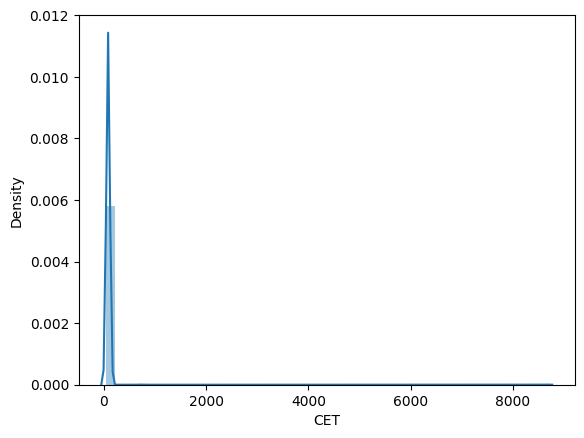

In [121]:
column_target = "CET"
sns.distplot(dataframe[column_target])

<Axes: xlabel='CET'>

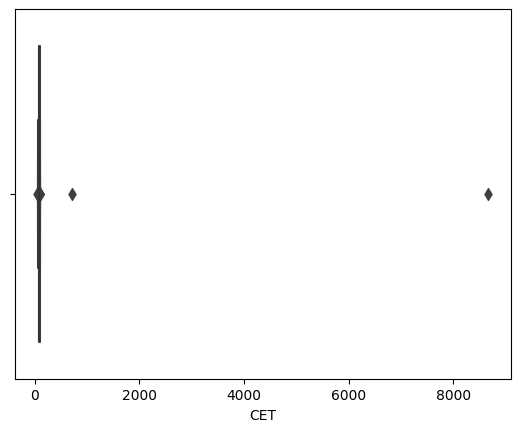

In [122]:
sns.boxenplot(x=dataframe[column_target])

<Axes: xlabel='COURSE', ylabel='Density'>

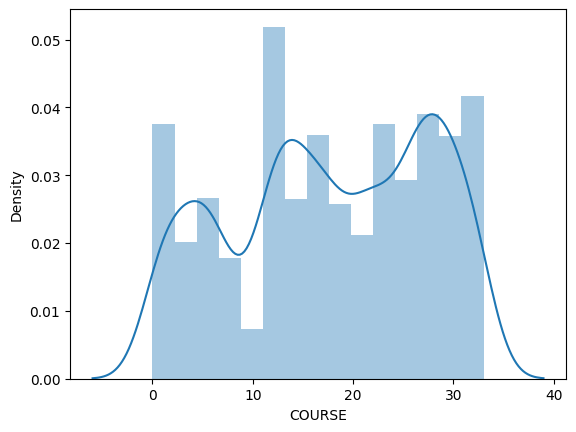

In [123]:
column_target = "COURSE"
sns.distplot(dataframe[column_target])

<Axes: xlabel='COURSE'>

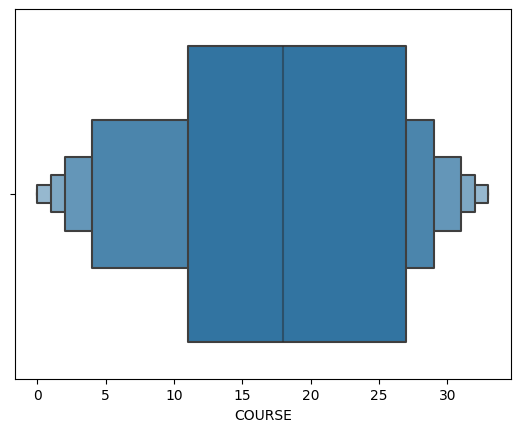

In [124]:
sns.boxenplot(x=dataframe[column_target])

# Preparing the model

Importing tools

In [125]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error
from pandas import DataFrame

Scaling the data

In [126]:
minMaxScaler = MinMaxScaler()

In [127]:
# Get all the columns except the target column
feature_column = dataframe.columns.difference(['COURSE'])

In [128]:
scaled_dataframe = DataFrame(minMaxScaler.fit_transform(dataframe[feature_column]))

In [129]:
scaled_dataframe.head()

,0,1,2
0,0.000464,0.458333,1.0
1,0.004176,0.416667,1.0
2,0.002900,0.666667,1.0
3,0.001508,0.708333,1.0
4,0.001972,0.625000,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

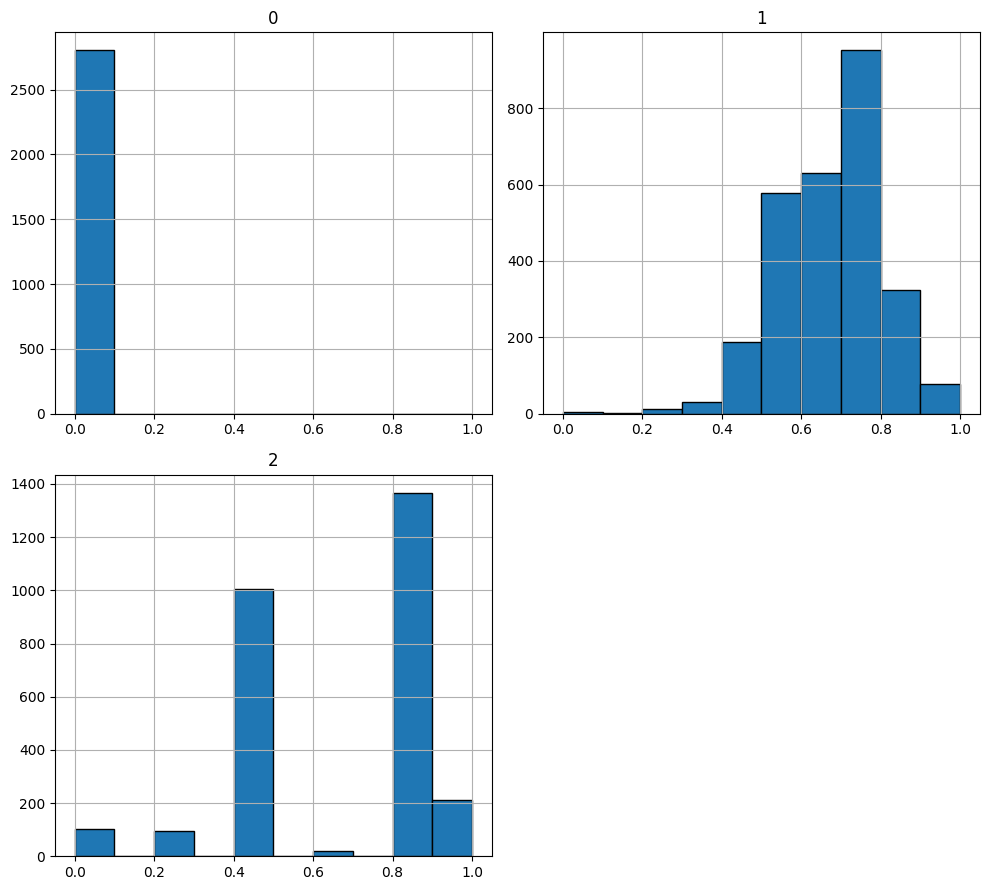

In [130]:
#Plot histogram of raw data
scaled_dataframe.hist(figsize=(10,9), ec="k")
plt.title('Histogram')
plt.tight_layout()
plt.show

Splitting the data

In [131]:
target_feature = dataframe[['COURSE']]
other_feature = dataframe[dataframe.columns.difference(['COURSE'])]

In [132]:
X_train,X_test,y_train,y_test=train_test_split(
    other_feature,
    target_feature,
    test_size=test_size,
    random_state= random_state
)

In [133]:
print('Training Set:', X_train.shape,y_train.shape)
print('Test Set:', X_test.shape,y_test.shape)

Training Set: (2381, 3) (2381, 1)
Test Set: (421, 3) (421, 1)


# Training the model

Importing tools

In [134]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
import math

Different types of training

1. SVM - Linear
2. SVM - Poly
3. DecisionTreeClassifier
4. LogisticRegression
5. GaussionNB

In [135]:
models = dict()

models['SvmLinear'] = SVC(kernel='linear')
models['SvmPoly'] = SVC(kernel='poly')
models['DecisionTreeClassifier'] = DecisionTreeClassifier()
models['LogisticRegression'] = LogisticRegression()
models['GaussianNB'] = GaussianNB()
models['KNeighborsClassifier'] = KNeighborsClassifier()

Running cross validation

In [136]:
for name, model in models.items():
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')
    print(name, '\n5-Fold Validation Scores:\n', scores)
    print('Cross Validation Average Score and StDev: %.3f (%.3f)\n' % (mean(scores), std(scores)))

SvmLinear 
5-Fold Validation Scores:
 [0.30188679 0.30882353 0.2710084  0.30672269 0.24789916]
Cross Validation Average Score and StDev: 0.287 (0.024)

SvmPoly 
5-Fold Validation Scores:
 [0.23899371 0.25630252 0.24789916 0.25630252 0.22268908]
Cross Validation Average Score and StDev: 0.244 (0.013)

DecisionTreeClassifier 
5-Fold Validation Scores:
 [0.26624738 0.2605042  0.25420168 0.24579832 0.28361345]
Cross Validation Average Score and StDev: 0.262 (0.013)

LogisticRegression 
5-Fold Validation Scores:
 [0.18658281 0.16596639 0.19537815 0.18277311 0.15756303]
Cross Validation Average Score and StDev: 0.178 (0.014)

GaussianNB 
5-Fold Validation Scores:
 [0.27672956 0.24789916 0.27941176 0.30462185 0.27941176]
Cross Validation Average Score and StDev: 0.278 (0.018)

KNeighborsClassifier 
5-Fold Validation Scores:
 [0.25786164 0.20168067 0.18277311 0.21218487 0.20588235]
Cross Validation Average Score and StDev: 0.212 (0.025)



Running confusion matrix

In [137]:
fh.write(f"\n -- Testing")

maxName = None
maxScore = 0.0

results = dict()
for name, model in models.items():
    model.fit(X_train,y_train)
    predicted=model.predict(X_test)
    print('\nAlgorithm: ', name)
    res_cm = confusion_matrix(y_test, predicted)
    print("Confusion Matrix: \n", res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print("Accuracy:", res_acc)
    results[name] = res_acc

    f1 = f1_score(y_test, predicted,  average='macro')
    recall = recall_score(y_test, predicted, average='macro')
    precision = precision_score(y_test, predicted, average='macro')

    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)

    if res_acc >= maxScore:
      maxScore = res_acc
      maxName = name

    fh.write(f"\n Algorithm: " + str(name))
    fh.write(f"\n Accuracy: " + str(res_acc))
    fh.write(f"\n F1 Score:" + str(f1))
    fh.write(f"\n Recall Score:" + str(recall))
    fh.write(f"\n Precision:" + str(precision))
    fh.write(f"\n -")

fh.write(f"\n ")


Algorithm:  SvmLinear
Confusion Matrix: 
 [[7 0 0 ... 0 0 2]
 [0 0 2 ... 1 1 3]
 [2 0 6 ... 0 4 2]
 ...
 [0 0 0 ... 7 1 0]
 [0 0 4 ... 2 1 1]
 [2 0 0 ... 0 0 6]]
Accuracy: 0.3182897862232779
F1 Score: 0.27468301186587957
Recall: 0.32087443193320214
Precision: 0.2517804473927407

Algorithm:  SvmPoly
Confusion Matrix: 
 [[7 0 0 ... 0 0 2]
 [0 0 2 ... 1 1 3]
 [2 0 6 ... 0 5 2]
 ...
 [0 0 0 ... 7 1 0]
 [0 0 4 ... 2 2 1]
 [1 0 1 ... 0 0 6]]
Accuracy: 0.27315914489311166
F1 Score: 0.16827897924827728
Recall: 0.21801085703615863
Precision: 0.1675442595024753

Algorithm:  DecisionTreeClassifier
Confusion Matrix: 
 [[6 0 0 ... 0 0 0]
 [0 2 0 ... 1 0 0]
 [3 0 5 ... 0 1 2]
 ...
 [1 0 0 ... 3 0 0]
 [0 2 0 ... 1 3 1]
 [3 2 0 ... 0 1 2]]
Accuracy: 0.28978622327790976
F1 Score: 0.28774702946417036
Recall: 0.30997032545287057
Precision: 0.30448065935511304

Algorithm:  LogisticRegression
Confusion Matrix: 
 [[ 2  0  0 ...  0  1  1]
 [ 0  0  1 ...  1  3  3]
 [ 1  0  0 ...  1 10  3]
 ...
 [ 0  0  0 ...

2

# Testing the model

In [138]:
import pickle
pickle.dump(models[maxName], open(current_version_folder + '/model.pkl','wb'))

In [139]:
test_model = pickle.load(open(current_version_folder + '/model.pkl','rb'))

In [140]:
# just run the this line of code to get the prediction.

new_Xdata = X_test.sample(sample_number)
new_ydata = y_test.loc[new_Xdata.index.values]
print(new_Xdata)
print("\n Input from respondent and it's taken course \n")
print(new_ydata)

pred=test_model.predict(new_Xdata)
print("\n Model's prediction \n")
print(pred)

index = 0
correct_guess = 0
for prediction in new_ydata['COURSE'].values:
  if pred[index] == prediction:
    correct_guess += 1
  index += 1

print("\n \nCorrect prediction: " + str(correct_guess) + " out of " + str(index))

        CET    GPA  STRAND
365   77.00  84.00       2
196   65.00  88.00       5
2136  94.00  97.00       4
309   82.81  93.00       2
439   76.00  92.00       2
233   78.81  97.00       2
2632  93.00  89.00       4
2678  93.00  92.00       4
1938  92.80  94.00       4
1322  99.10  94.57       4

 Input from respondent and it's taken course 

      COURSE
365        5
196       23
2136      19
309       18
439        5
233       30
2632      27
2678      27
1938      14
1322      13

 Model's prediction 

[ 4 22 27  7 32 31 28 27 27 14]

 
Correct prediction: 1 out of 10


In [141]:
f1 = f1_score(new_ydata, pred,  average='macro')
recall = recall_score(new_ydata, pred, average='macro')
precision = precision_score(new_ydata, pred, average='macro')

print("Accuracy: ", maxScore)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

fh.write(f"\n -- Scoring based on " + str(maxName))
fh.write(f"\n Accuracy:" + str(maxScore))
fh.write(f"\n F1 Score:" + str(f1))
fh.write(f"\n Recall Score:" + str(recall))
fh.write(f"\n Precision:" + str(precision))
fh.write(f"\n ")

Accuracy:  0.3182897862232779
F1 Score: 0.028571428571428574
Recall: 0.03571428571428571
Precision: 0.023809523809523808


2

In [142]:
fh.close()
os.rename(current_version_folder, current_version_folder + str(maxScore))

In [143]:
# Validate list of course
# Make there is no invalid input

In [144]:
# Validate list of Strand
# Make there is no invalid input
# My suggesstion is to generalize nalang rather than puting TVL - HE, TVL - ICT, etc.

In [145]:
# Get only 200 to N samples for each class to have a balanced course.

In [146]:
# Check for a valid input for GPA, CET